In [3]:
import torch
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os

## change root accordingly
root = "/Users/zyxu/Documents/git/FM_weights/"
os.chdir(root)

## load

In [4]:
loaded_tensor = torch.load(f'{root}/output/4sets_intermediate_outputs.pth')
print(loaded_tensor.shape)

torch.Size([13, 256, 197, 192])


In [5]:
from utils import intermdiates_to_pos_ctx
res = intermdiates_to_pos_ctx(loaded_tensor, normalize = False)
res.keys()

dict_keys(['mu', 'pos', 'ctx', 'resid', 'cvec'])

# start visz

Layer progress: 100%|██████████| 12/12 [00:00<00:00, 32.23it/s]


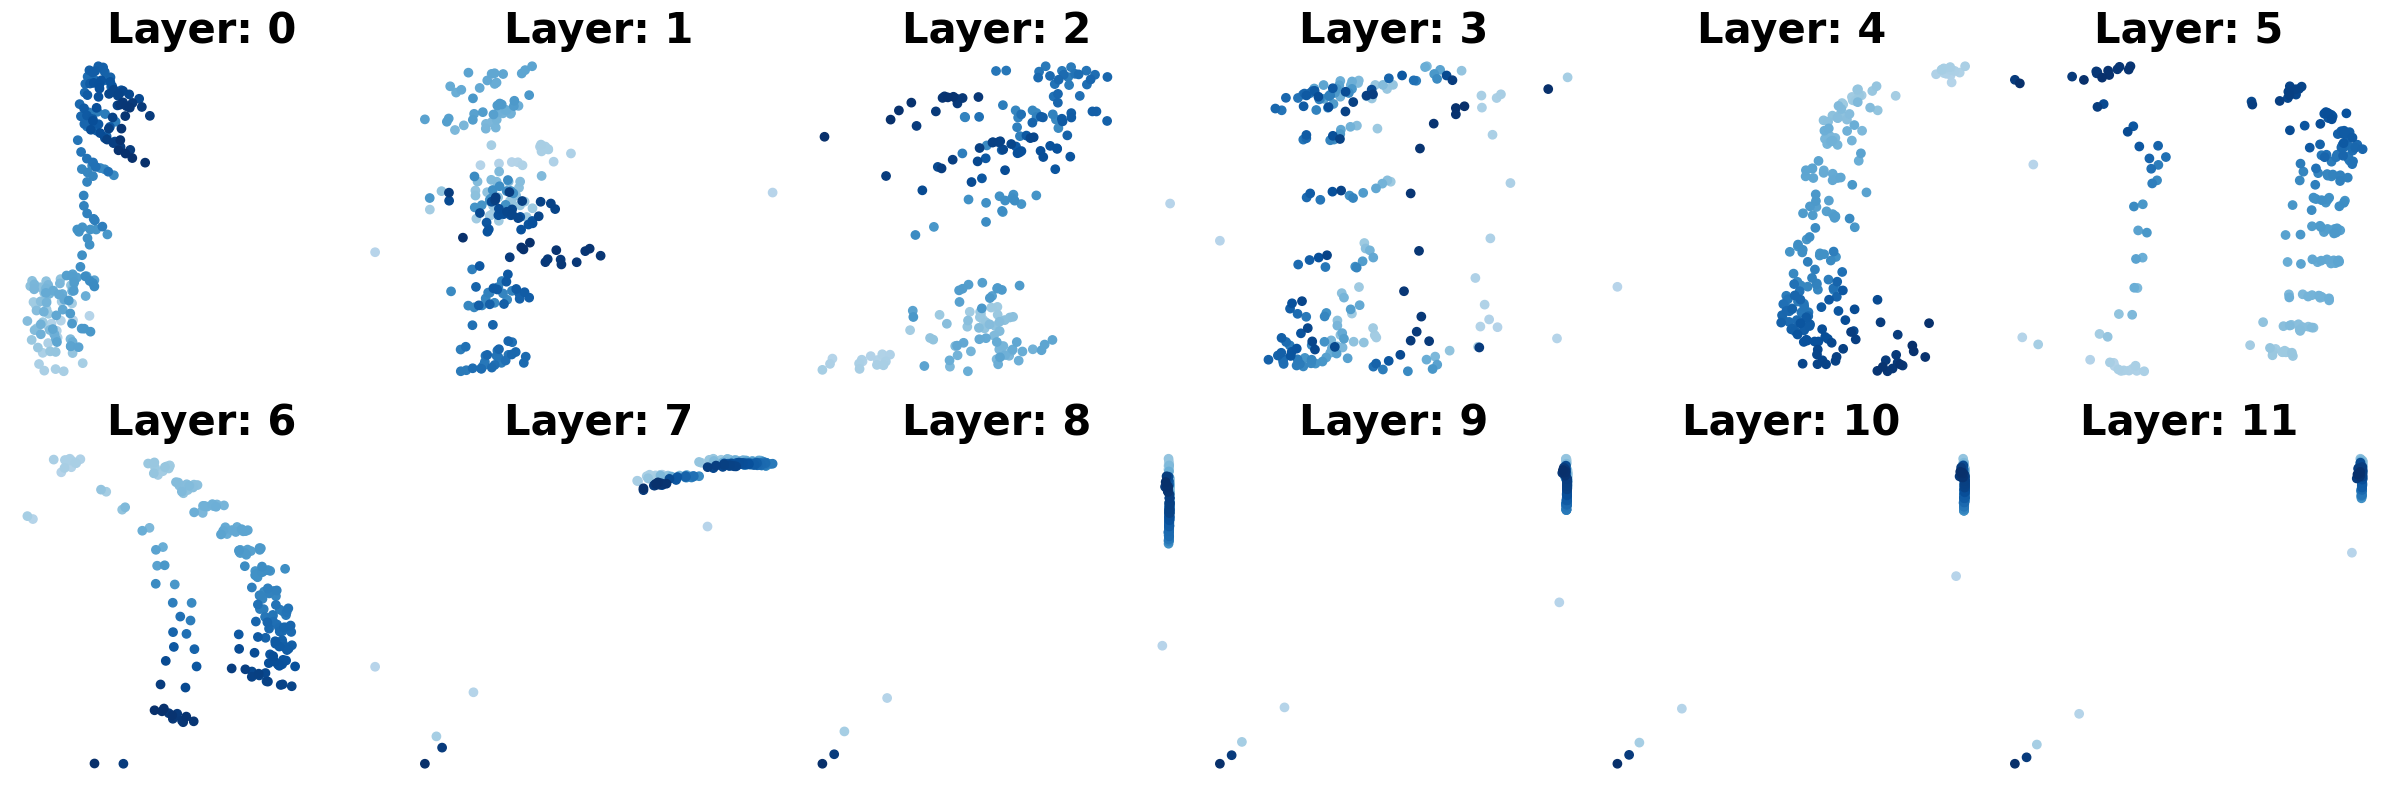

In [6]:
from utils import visz_pca_pos_cvec
visz_pca_pos_cvec.plot(res['pos'].detach(),res['cvec'].detach(), plot_context=False)

Layer Progress: 100%|██████████| 12/12 [00:07<00:00,  1.51it/s]


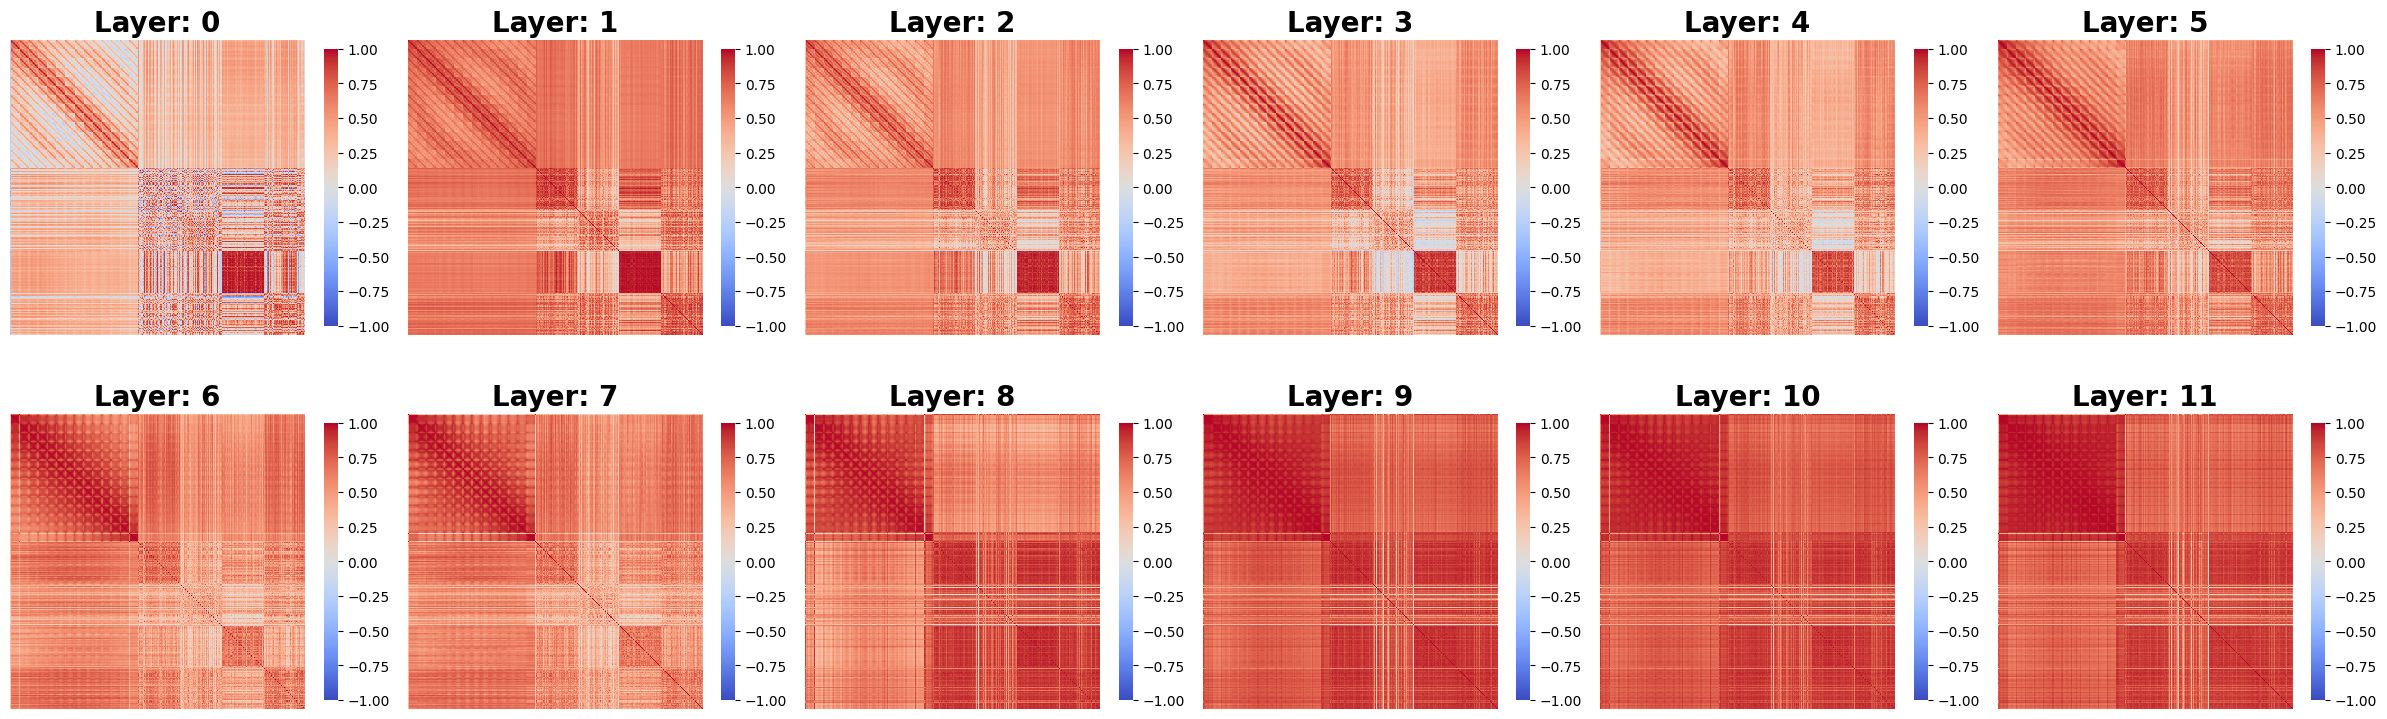

In [7]:
from utils import visz_gram_pos_cbasis
visz_gram_pos_cbasis.plot(res['pos'].detach(),res['ctx'].detach(),)# save_to= "output/figure2.pdf")

Layer progress: 100%|██████████| 12/12 [00:00<00:00, 37.85it/s]


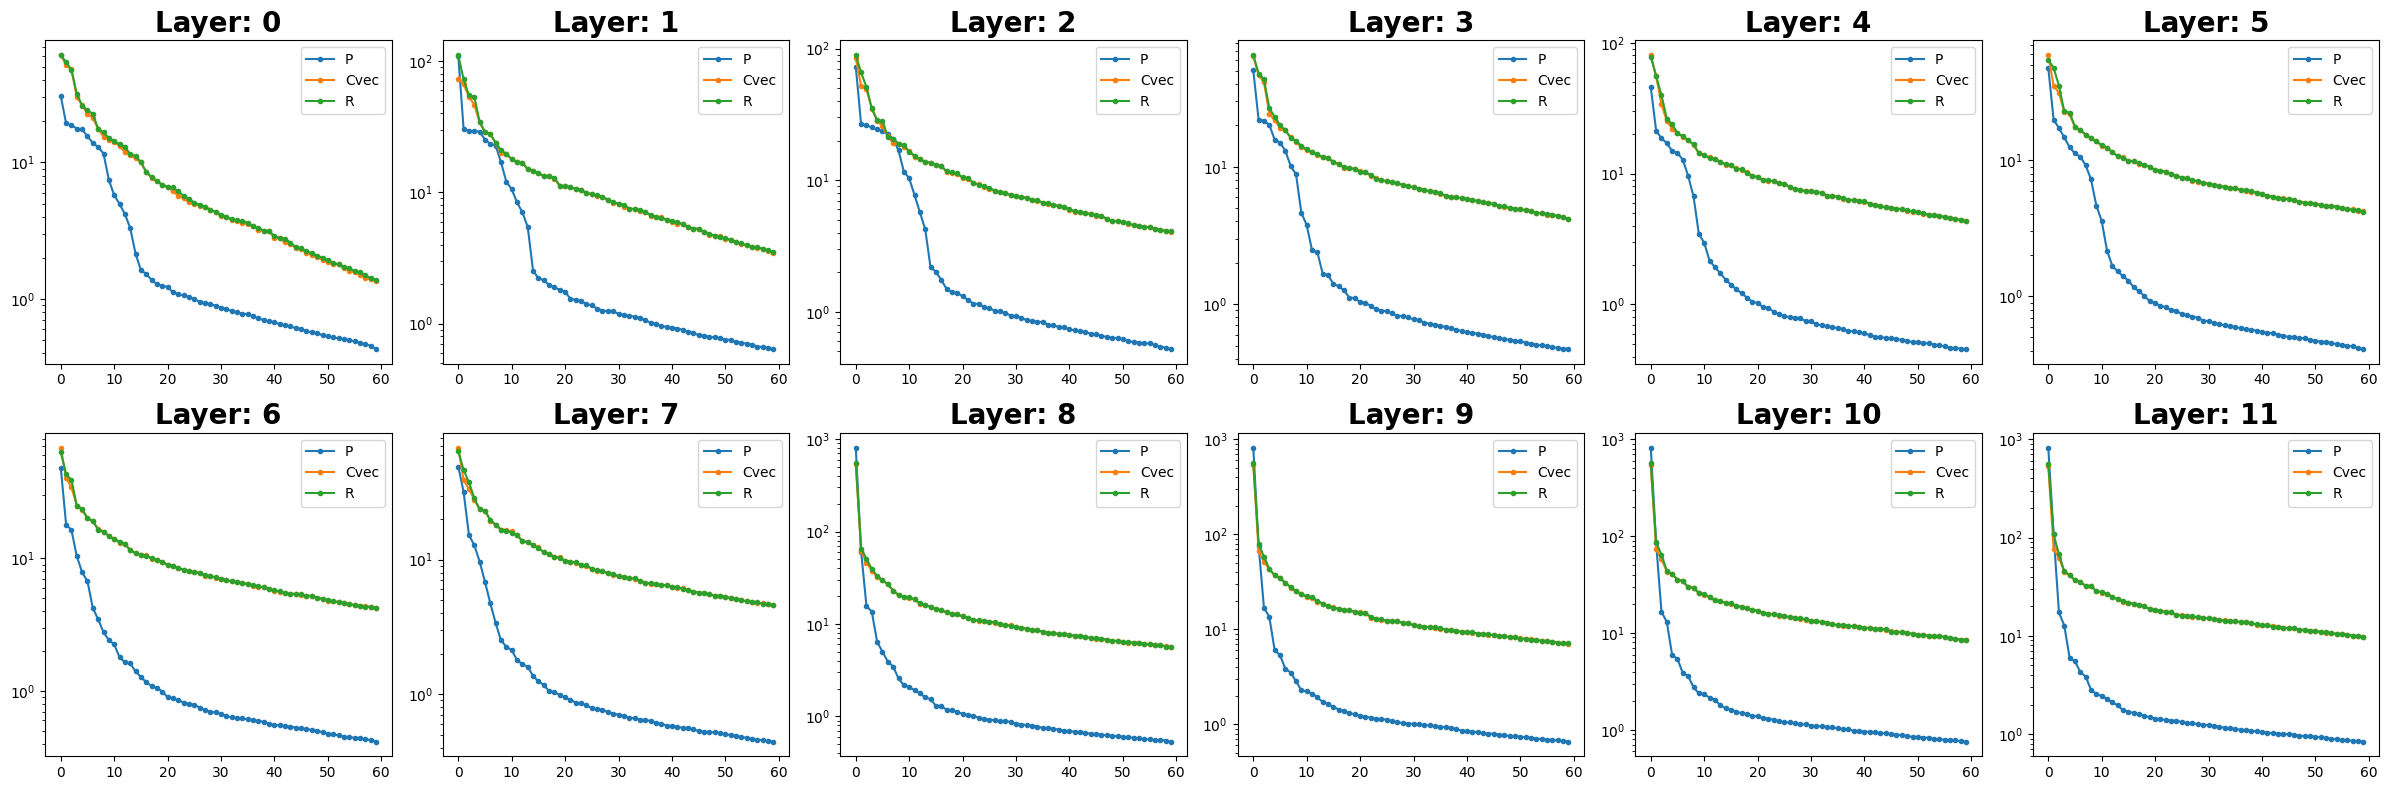

In [8]:
from utils import visz_svals_pos
visz_svals_pos.plot(res['pos'].detach(),res['cvec'].detach().view(13,-1,192),res['resid'].detach().view(13,-1,192))

Layer Progress`: 100%|██████████| 12/12 [00:04<00:00,  2.52it/s]


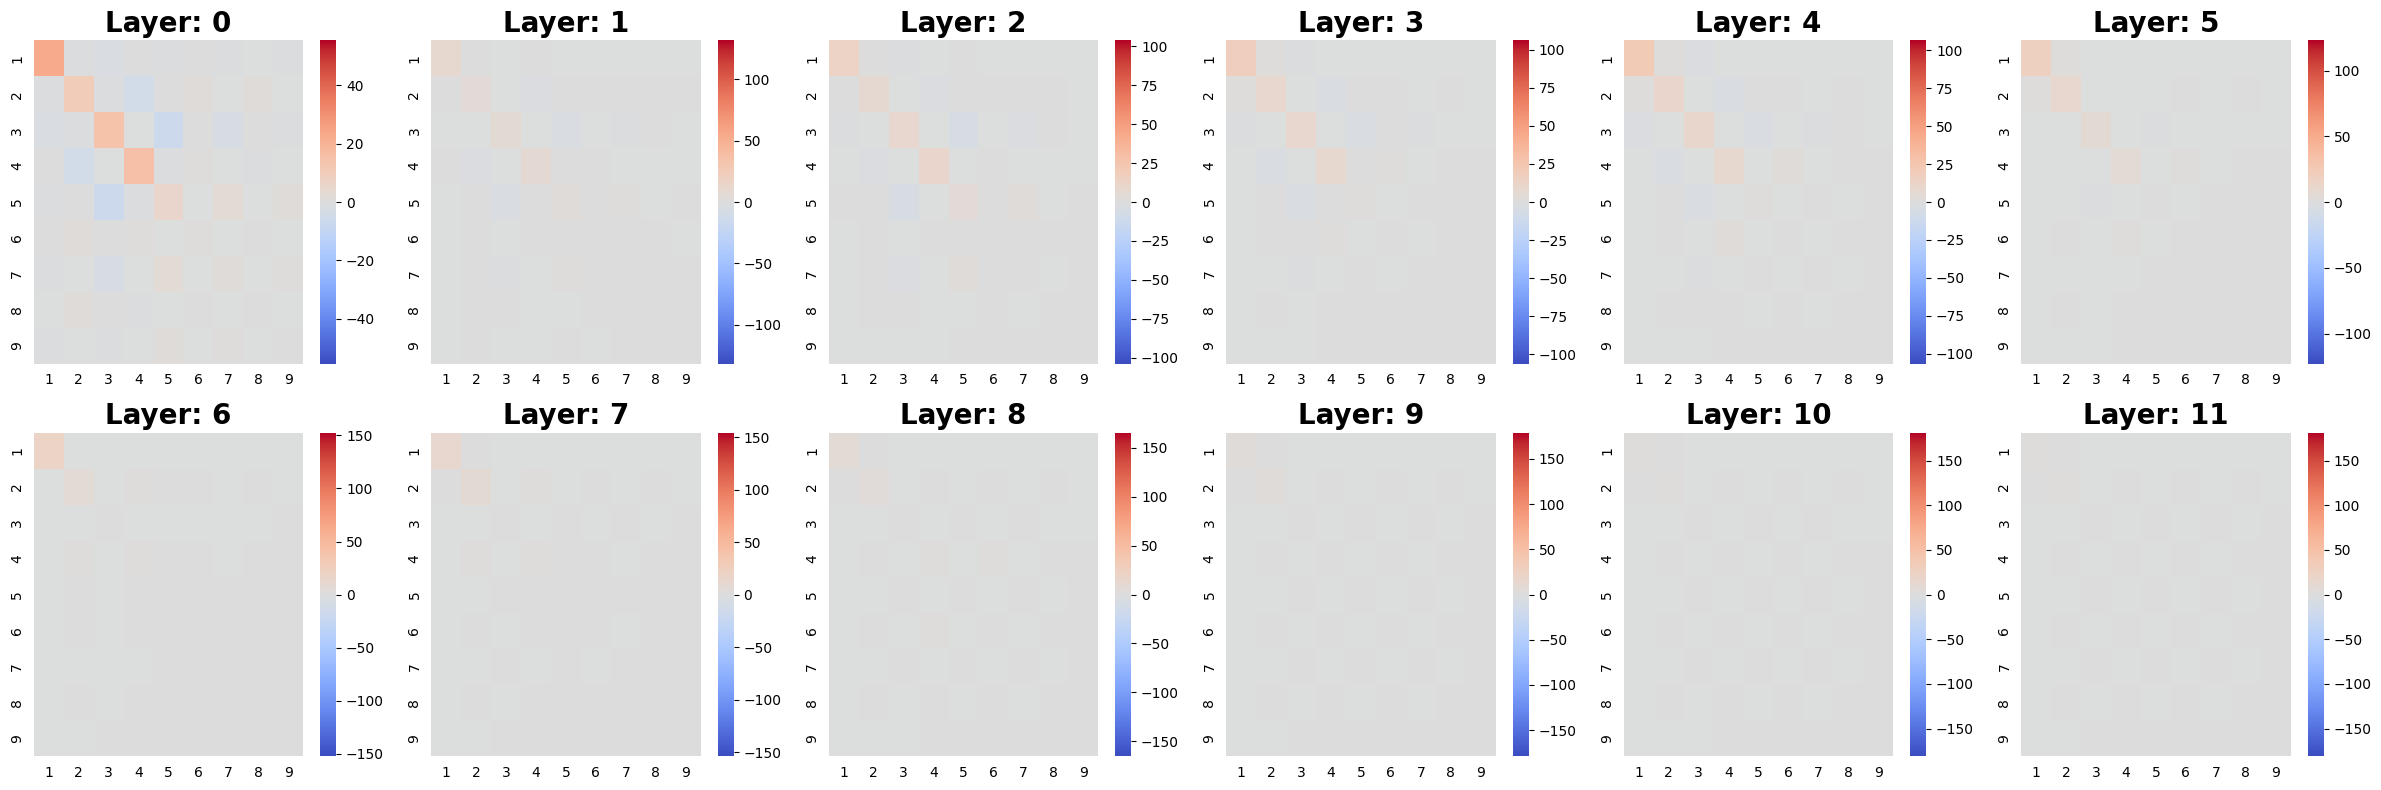

In [11]:
# right
from utils import visz_fourier_pos

visz_fourier_pos.plot(res['pos'].detach().numpy())

/Users/zyxu/opt/anaconda3/envs/py39/lib/python3.9/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


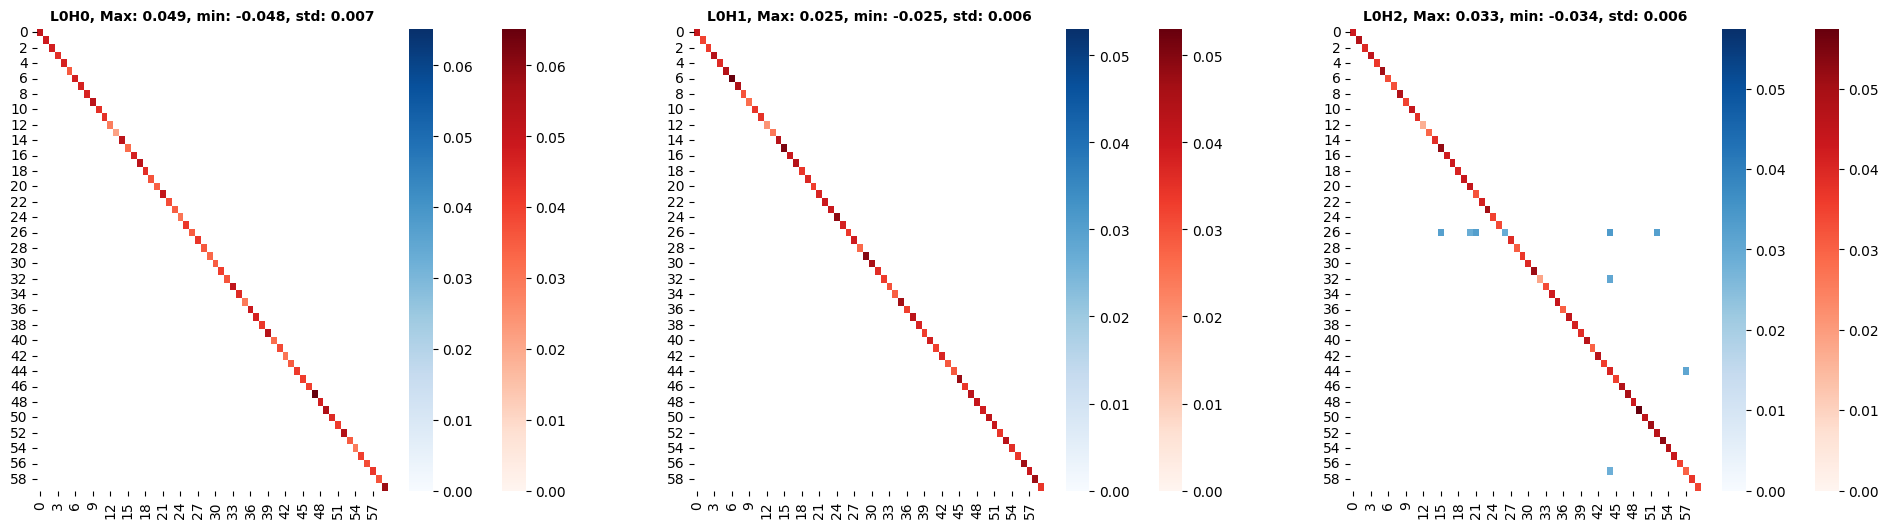

In [12]:
from utils import visz_att_weights_vit
visz_att_weights_vit.plot(0,res['pos'].detach())

In [13]:
C = 192

sigma_multiplier = np.sqrt(2 * np.log(C**2))  # denoising parameter
sigma_multiplier

4.585845776747308

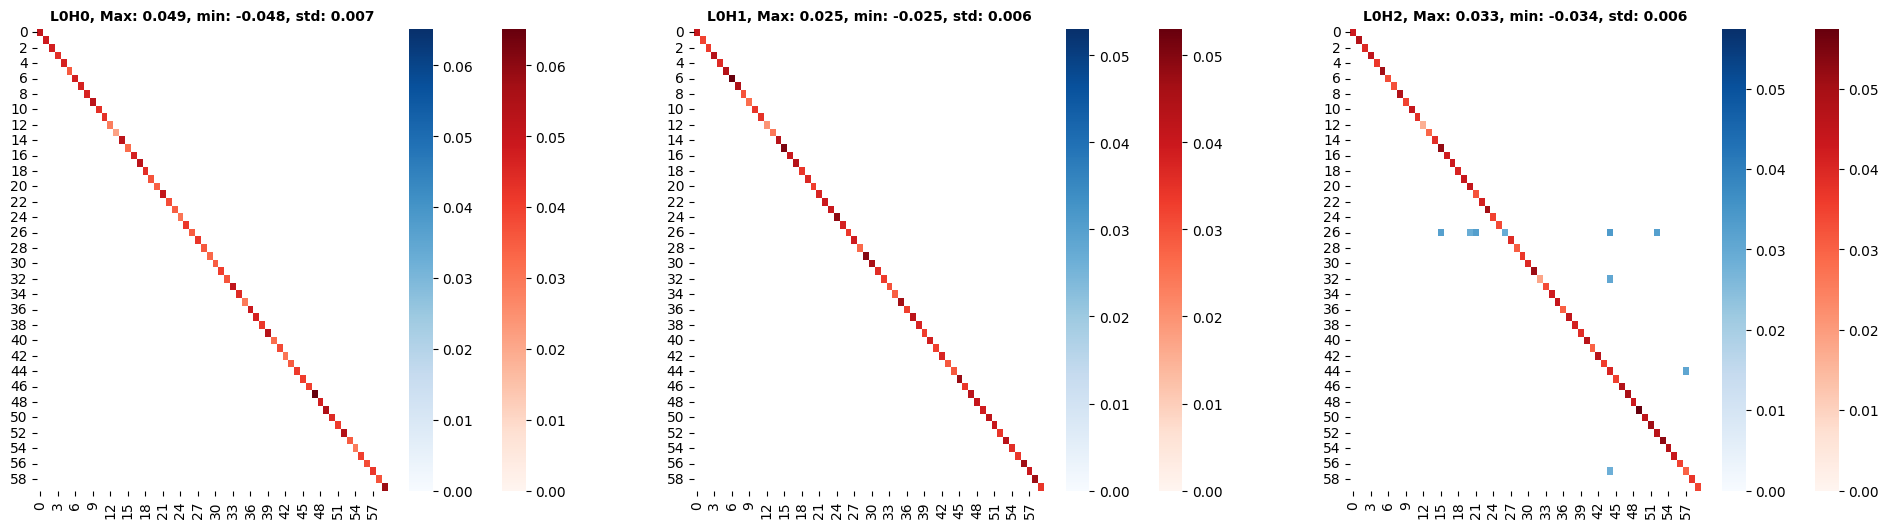

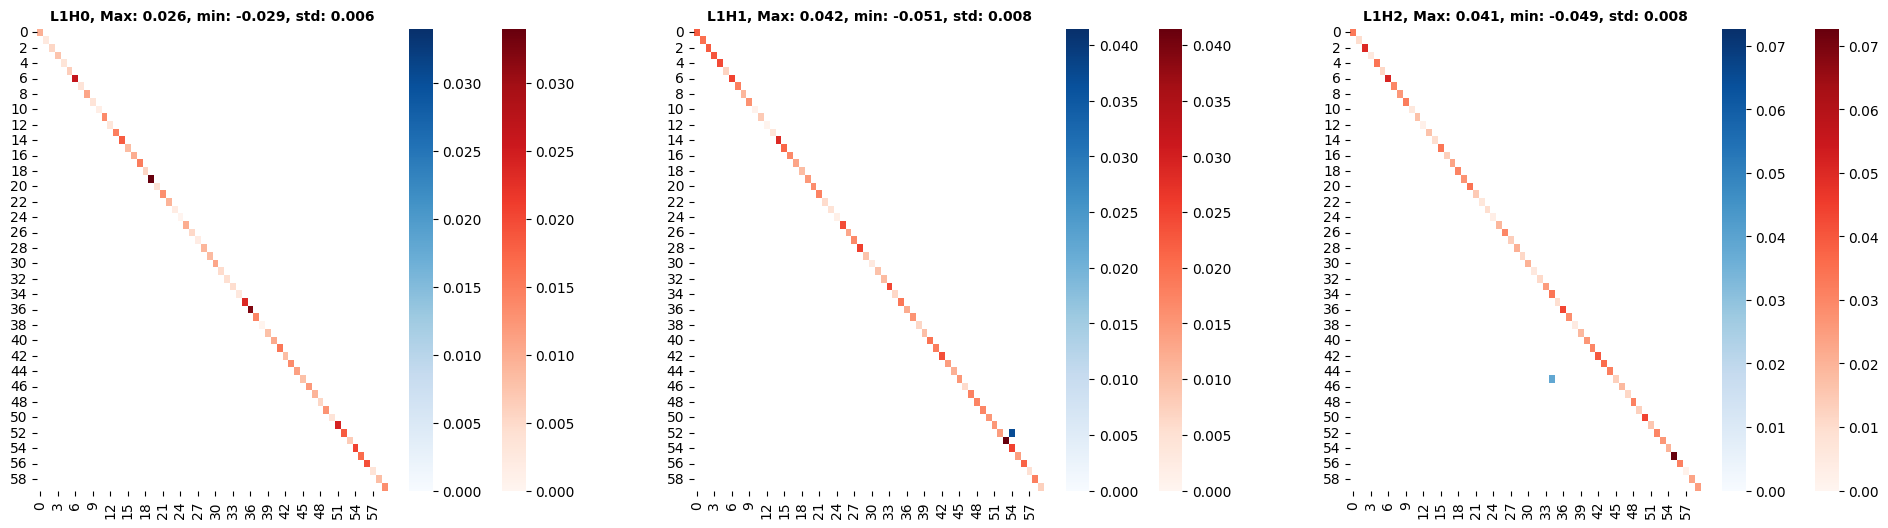

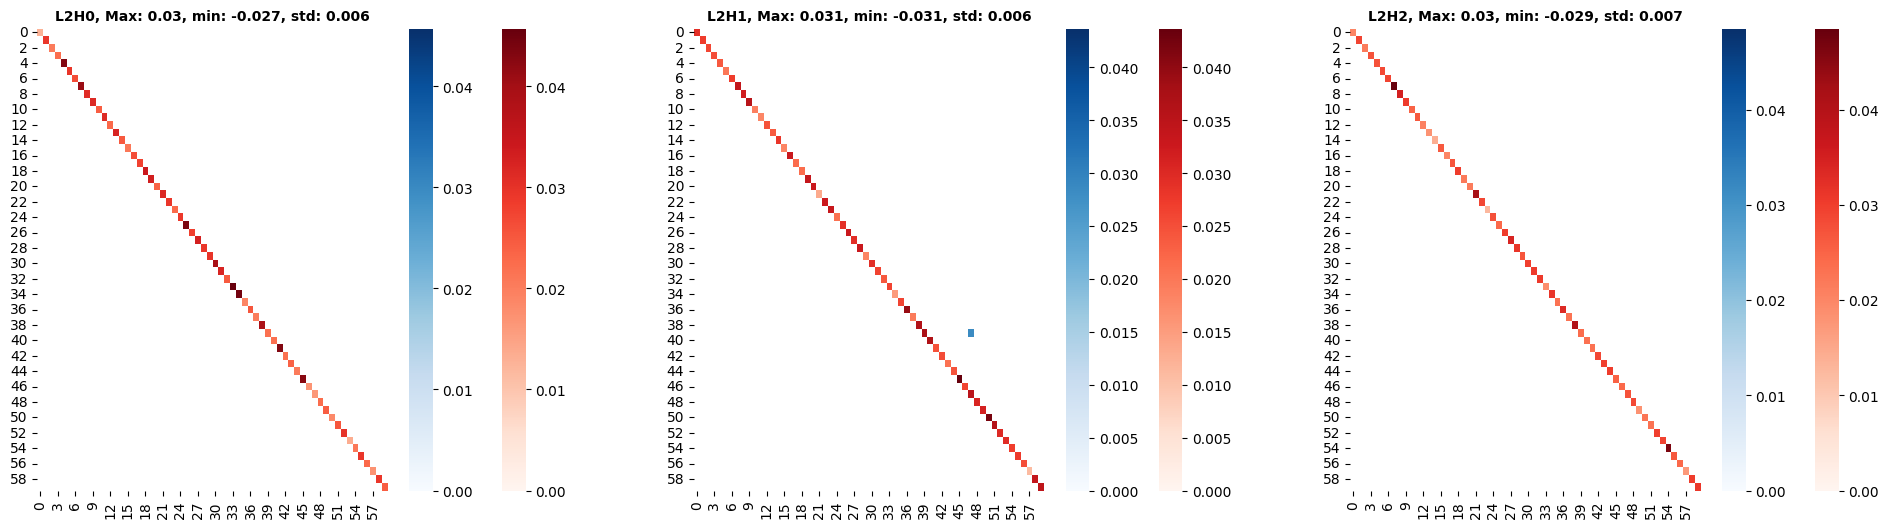

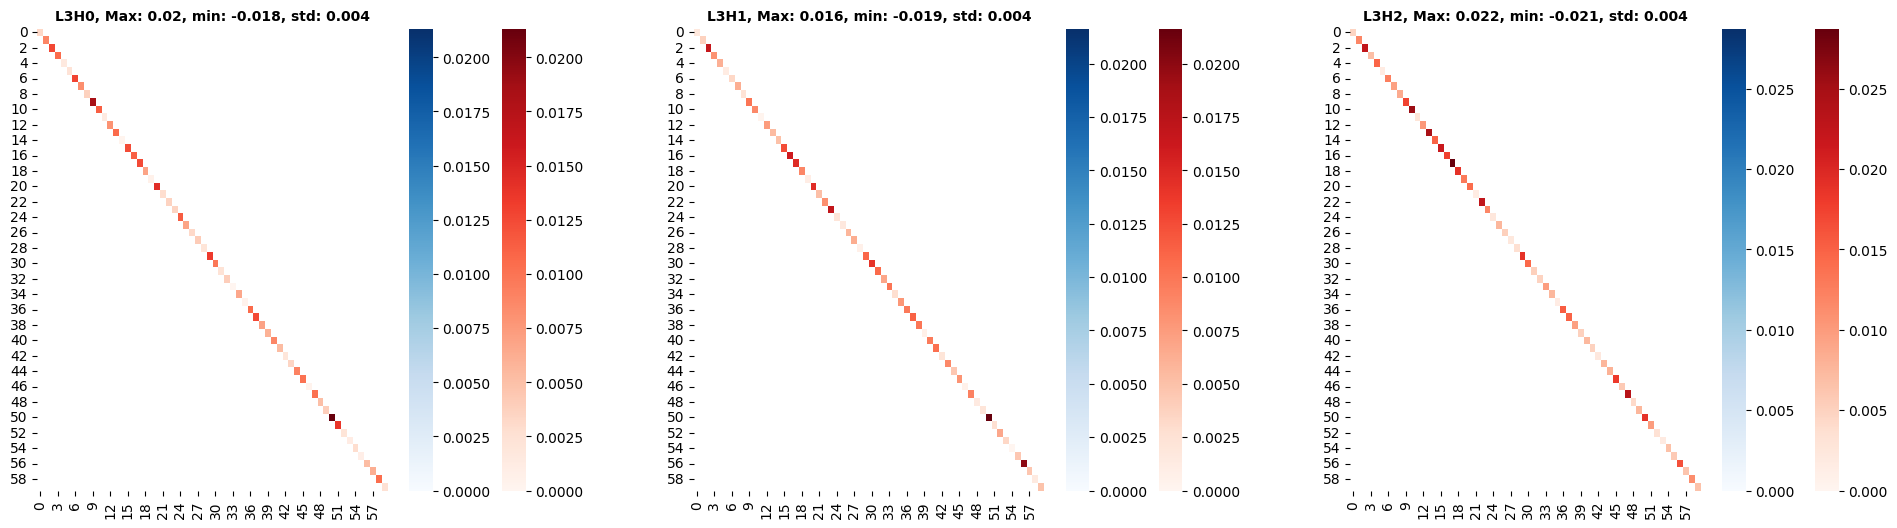

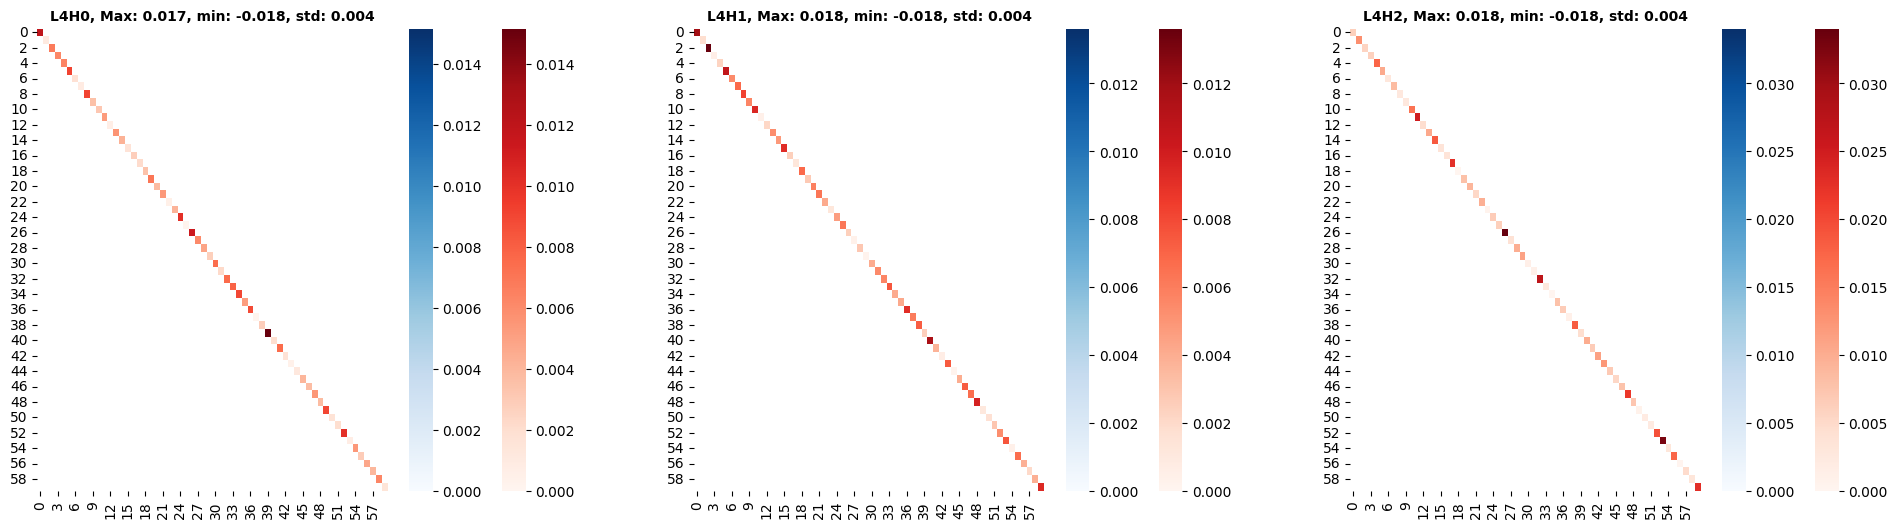

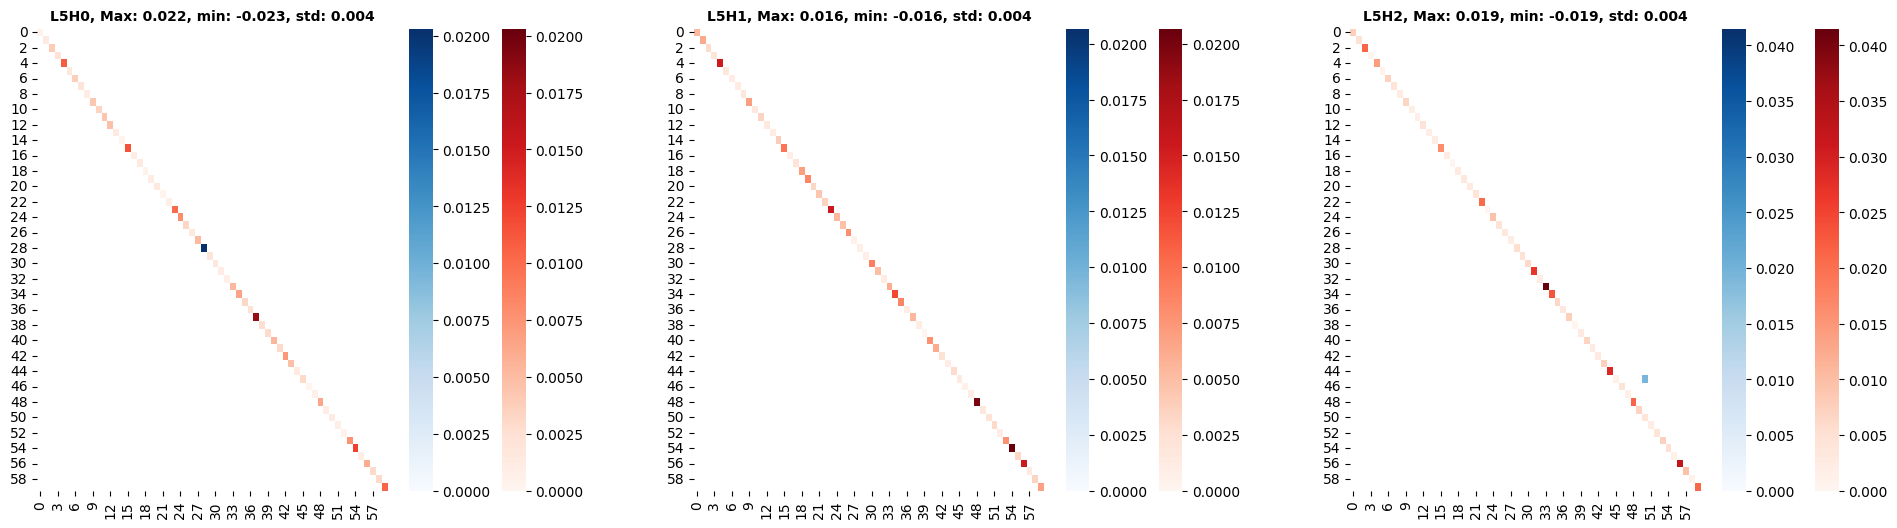

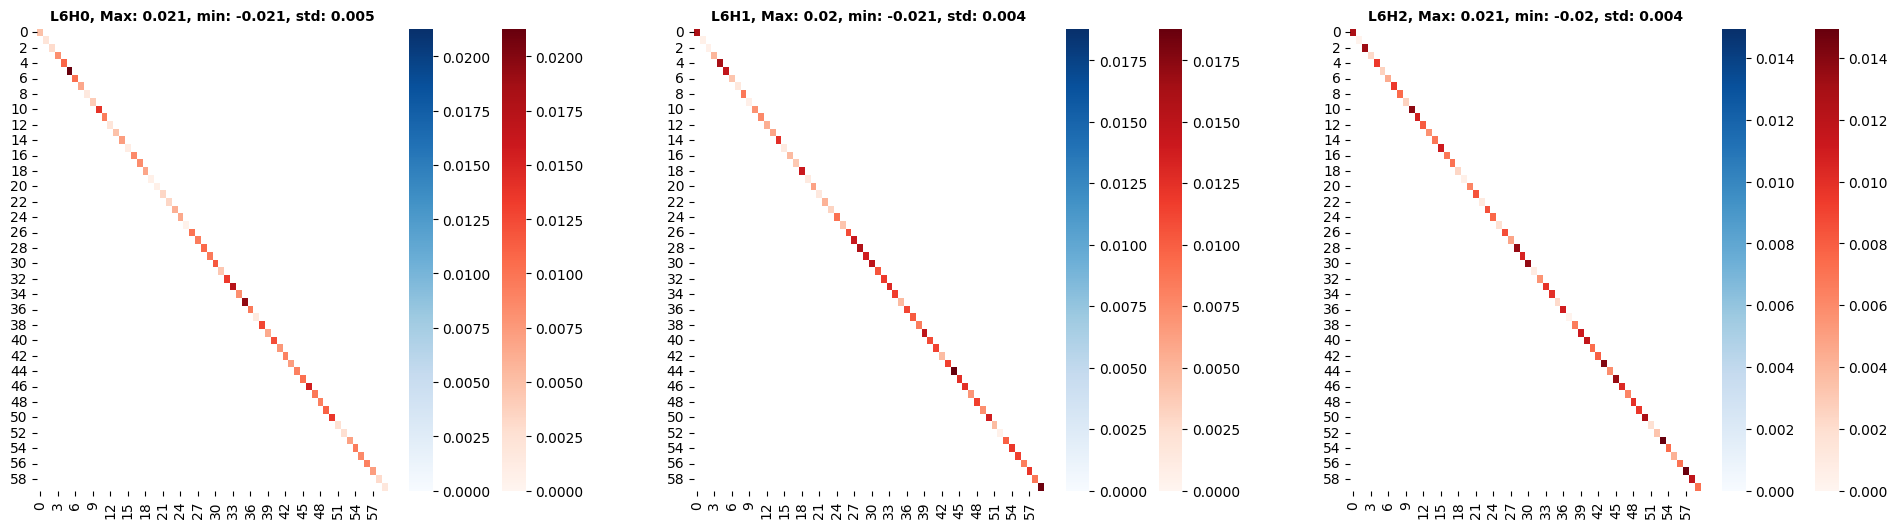

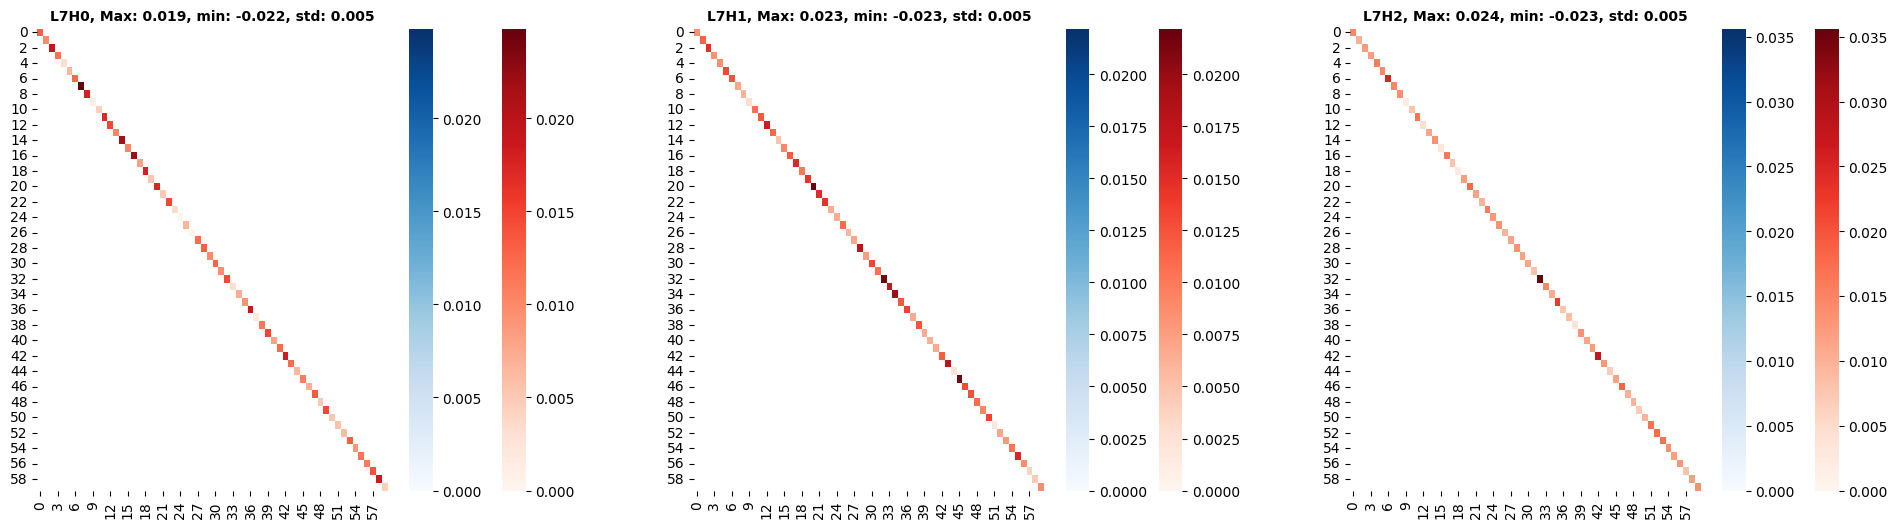

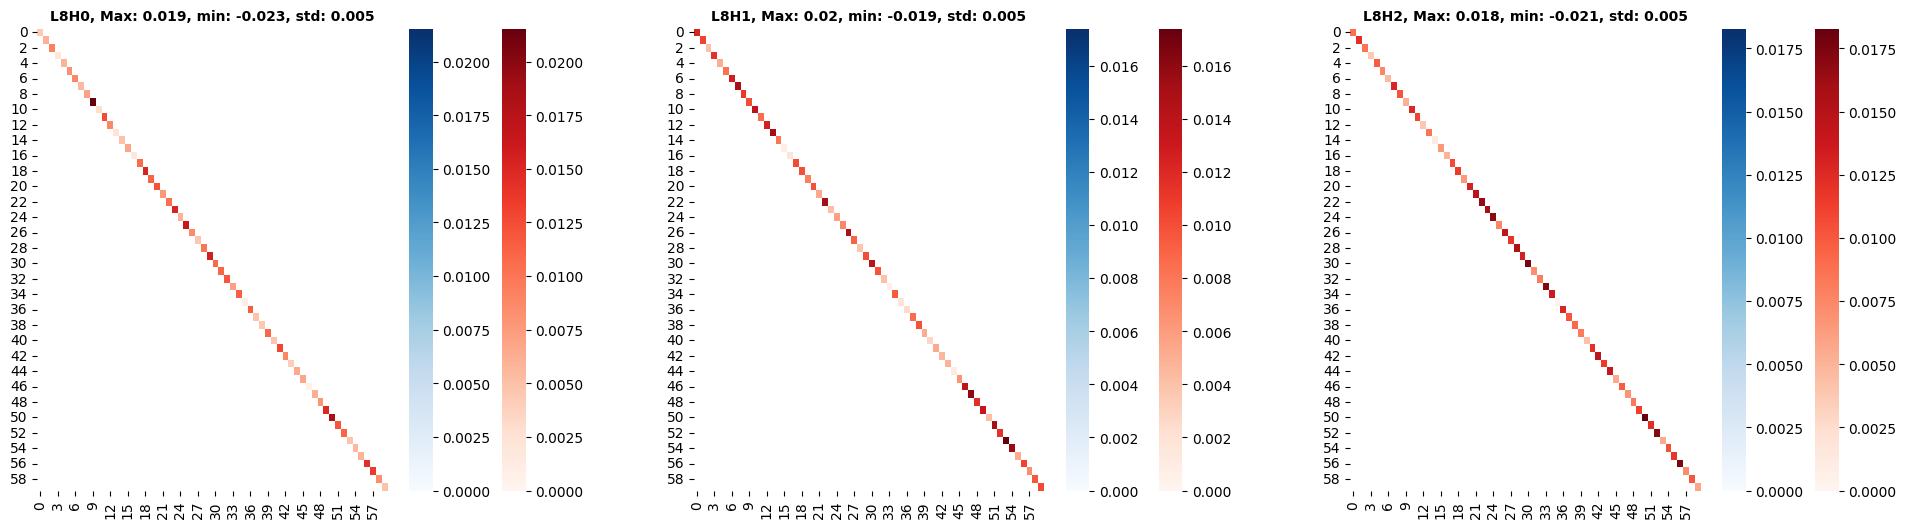

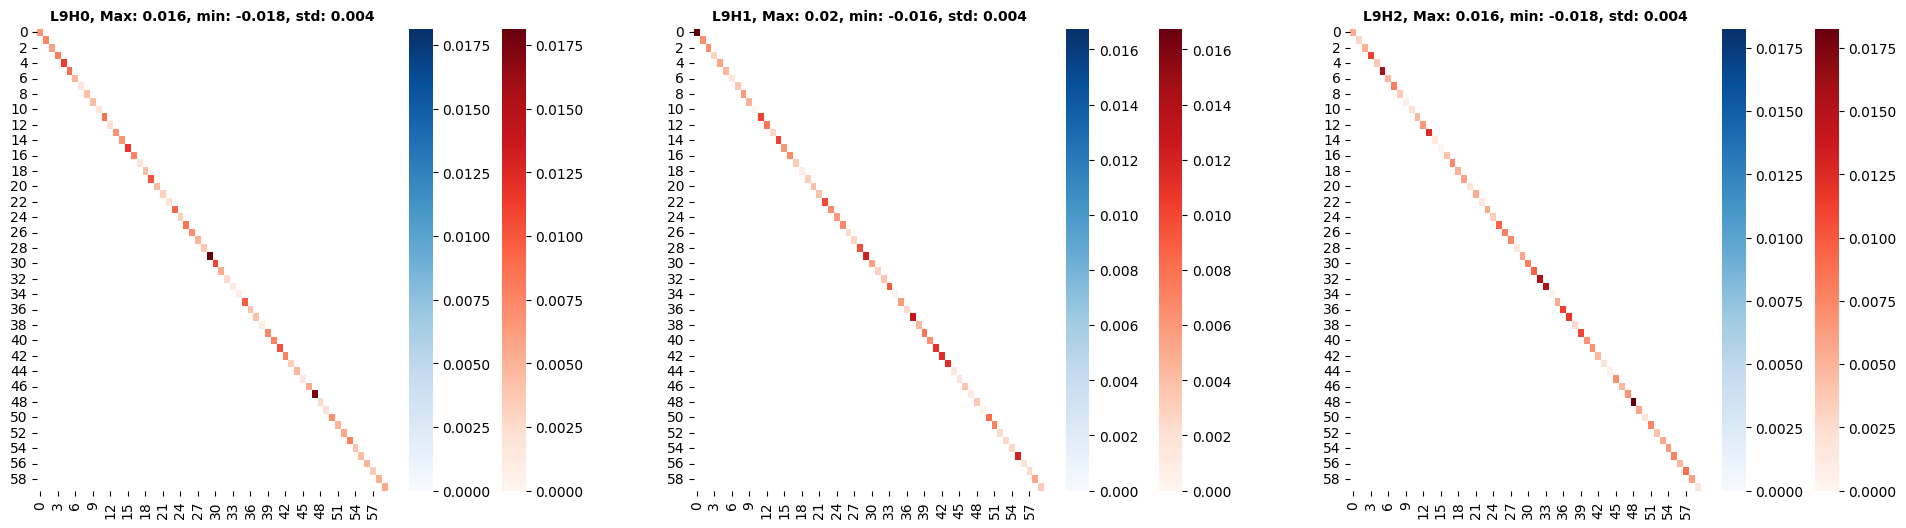

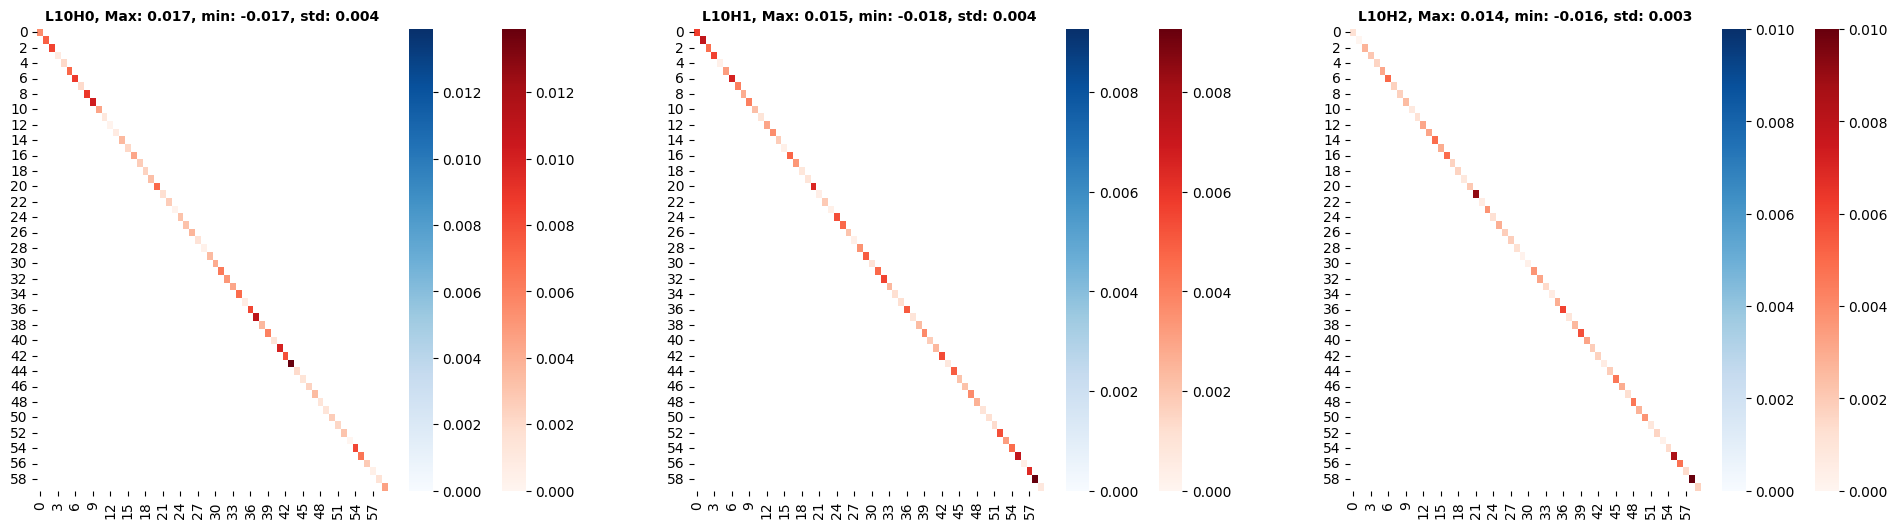

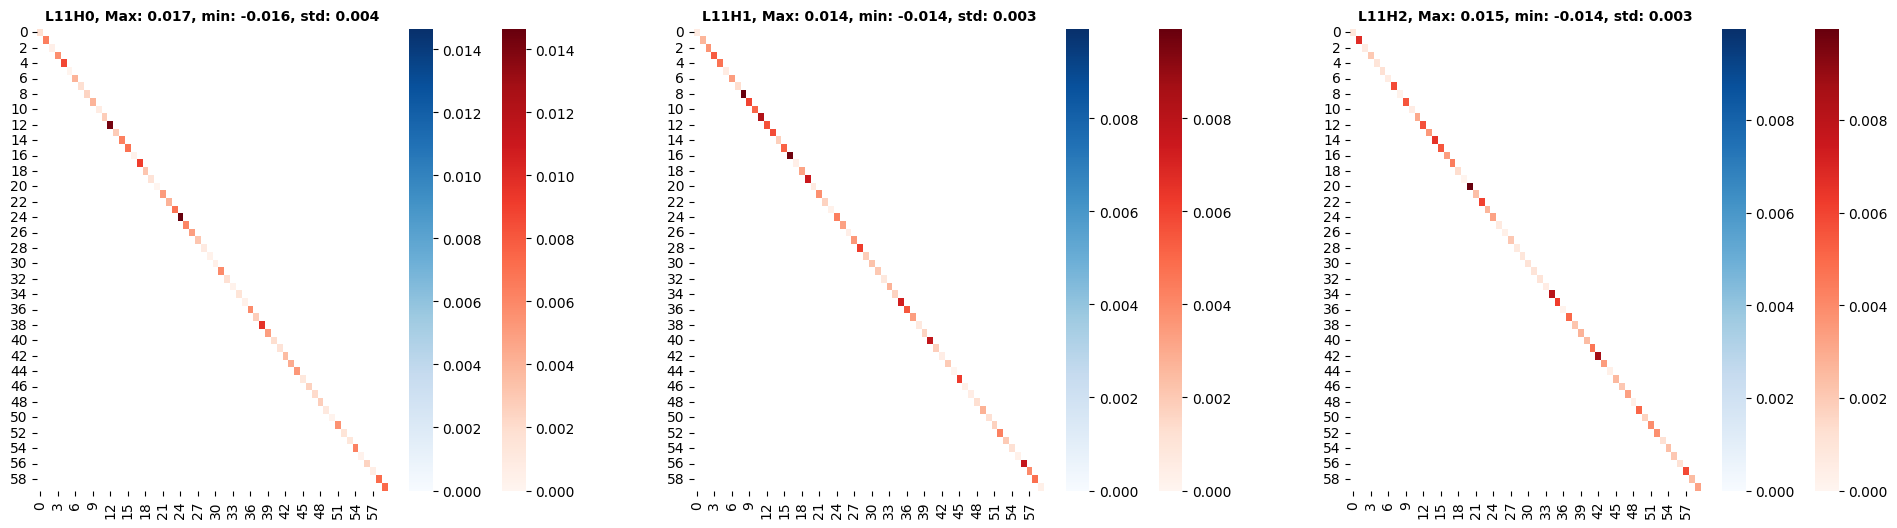

In [14]:
for i in range(12):
    visz_att_weights_vit.plot(i,res['pos'].detach(), sigma_multiplier = sigma_multiplier)